In [19]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [5]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [6]:
predict = "G3"

In [23]:
X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [9]:
linear = linear_model.LinearRegression()

In [10]:
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
acc = linear.score(x_test, y_test)
print(acc)

0.7427933327623859


In [12]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.14901929  0.96714906 -0.1485248  -0.34860641  0.03234547]
Intercept: 
 -1.27989727199453


In [13]:
predictions = linear.predict(x_test)

In [14]:
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

9.1810891664636 [11  9  1  1 19] 10
8.17052966257595 [7 9 2 0 0] 8
11.205724406256484 [12 11  2  0 11] 11
13.489549475618297 [14 13  1  0  8] 13
3.6160136502071776 [3 5 2 1 8] 5
9.02612953745279 [10  9  3  1 28] 9
9.50040823795891 [ 9 10  2  0  2] 9
18.513588847309975 [17 18  1  0  0] 18
11.318527030245564 [ 9 12  3  0  3] 11
10.616576582552929 [10 11  2  0  2] 11
15.16557830201741 [15 15  2  0  0] 15
7.42225450578248 [8 9 1 3 0] 10
16.4302714440606 [16 16  1  0  0] 15
8.617587520391966 [10  9  2  0  0] 0
14.570490135241714 [13 15  4  0  0] 15
8.320537925493616 [10  9  4  0  0] 0
14.048915468933894 [13 14  1  0  0] 13
12.115606328602192 [15 12  3  0  0] 14
11.30030466115427 [11 12  3  1  4] 11
15.016064527589238 [13 15  1  0  0] 15
15.16557830201741 [15 15  2  0  0] 15
9.649427523897582 [10 10  2  0  2] 10
2.7860963399608423 [7 4 1 2 0] 0
12.76202128861539 [14 12  2  0 20] 13
9.564604694319682 [ 8 10  1  0  4] 10
7.352399889859274 [8 8 2 0 0] 9
17.8184061327322 [17 17  2  0 13] 17
15.0

In [15]:
xaxis = np.arange(0,len(X), 1)

In [16]:
y = np.transpose(y)

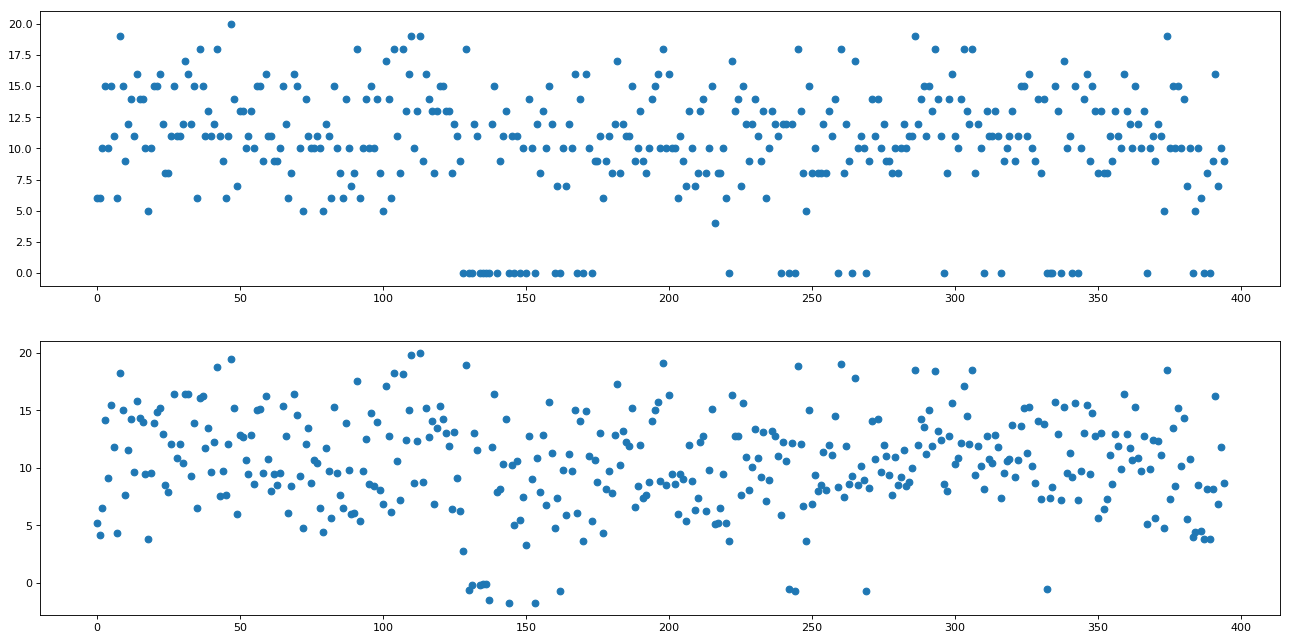

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
z = linear.predict(X)
plt.subplot(2,1,1)
plt.scatter(xaxis, y)
plt.subplot(2,1,2)
plt.scatter(xaxis, z)
plt.show()

In [20]:
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

In [27]:
X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels
best = 0
for i in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
            
print("Best accuracy : " + str(best))

Accuracy: 0.7654028848754161
Accuracy: 0.8451125999428328
Accuracy: 0.8533638989957713
Accuracy: 0.8044632209961489
Accuracy: 0.9107745056726008
Accuracy: 0.7152544567869148
Accuracy: 0.8226416092213975
Accuracy: 0.7415071810541153
Accuracy: 0.8381175736603794
Accuracy: 0.9019565896412531
Accuracy: 0.8011912678716442
Accuracy: 0.8579973754593435
Accuracy: 0.8714356810811684
Accuracy: 0.8313432173971557
Accuracy: 0.9171080482098379
Accuracy: 0.8456962842386548
Accuracy: 0.9314779883049755
Accuracy: 0.7820558738818422
Accuracy: 0.9023994185395404
Accuracy: 0.7396173501504808
Best accuracy : 0.9314779883049755


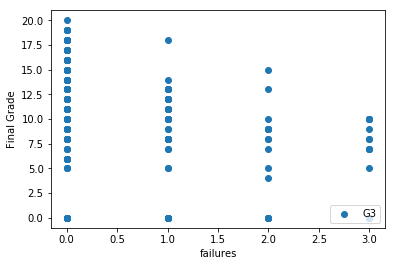

In [28]:
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

In [29]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

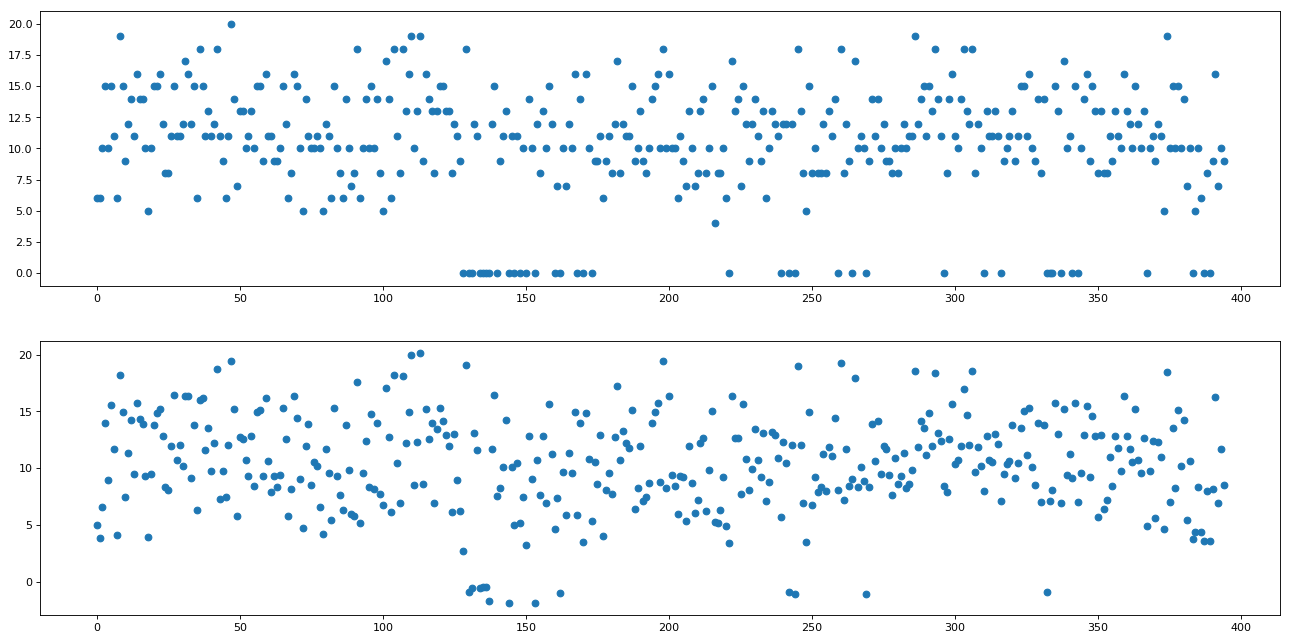

In [30]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
z = linear.predict(X)
plt.subplot(2,1,1)
plt.scatter(xaxis, y)
plt.subplot(2,1,2)
plt.scatter(xaxis, z)
plt.show()